In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import cluster

In [14]:
playlist_spotify = pd.read_csv("/Users/amandamac/IronHackerDA/lab-web-scraping-single-page/playlist_spotify.csv")

In [15]:
playlist_spotify = playlist_spotify.drop("Unnamed: 0", axis=1)
playlist_spotify.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist
0,Hozier,Hozier (Deluxe),Take Me To Church,7dS5EaCoMnN7DzlpT6aRn2,0.566,0.664,4,-5.303,0,0.0464,0.000000,0.116,0.437,128.945,241688,4,NaN
1,Mike Posner,31 Minutes to Takeoff,Cooler Than Me - Single Mix,2V4bv1fNWfTcyRJKmej6Sj,0.768,0.820,7,-4.630,0,0.0474,0.000000,0.689,0.625,129.965,213293,4,NaN
2,"Tyler, The Creator",Flower Boy,See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,0.558,0.559,6,-9.222,1,0.0959,0.000007,0.109,0.620,78.558,180387,4,NaN
3,Bastille,Bad Blood,Pompeii,3gbBpTdY8lnQwqxNCcf795,0.679,0.715,9,-6.383,1,0.0407,0.000000,0.271,0.571,127.435,214148,4,NaN
4,Shakira,"Oral Fixation, Vol. 2 (Expanded Edition)",Hips Don't Lie (feat. Wyclef Jean),3ZFTkvIE7kyPt6Nu3PEa7V,0.778,0.824,10,-5.892,0,0.0707,0.000000,0.405,0.758,100.024,218093,4,NaN


In [16]:
playlist_spotify.dtypes

artist               object
album                object
track_name           object
track_id             object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
playlist             object
dtype: object

In [17]:
playlist_spotify_model = playlist_spotify.select_dtypes(include=np.number)

In [18]:
playlist_spotify_model

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.566,0.664,4,-5.303,0,0.0464,0.000000,0.1160,0.437,128.945,241688,4
1,0.768,0.820,7,-4.630,0,0.0474,0.000000,0.6890,0.625,129.965,213293,4
2,0.558,0.559,6,-9.222,1,0.0959,0.000007,0.1090,0.620,78.558,180387,4
3,0.679,0.715,9,-6.383,1,0.0407,0.000000,0.2710,0.571,127.435,214148,4
4,0.778,0.824,10,-5.892,0,0.0707,0.000000,0.4050,0.758,100.024,218093,4
...,...,...,...,...,...,...,...,...,...,...,...,...
5989,0.607,0.820,11,-7.754,1,0.0597,0.000068,0.2690,0.768,126.988,207507,4
5990,0.421,0.858,1,-4.535,1,0.0963,0.000000,0.0670,0.491,173.255,206773,4
5991,0.767,0.787,3,-9.897,1,0.0331,0.583000,0.0513,0.964,126.879,266200,4
5992,0.367,0.959,4,-2.982,1,0.1100,0.000000,0.1200,0.103,125.939,205920,4


In [19]:
X_prep = StandardScaler().fit_transform(playlist_spotify_model)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=playlist_spotify_model.columns).head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.659056,-0.155332,-0.344409,0.362377,-1.149546,-0.539892,-0.214326,-0.496258,-0.385146,0.248190,0.622093,0.102047
1,0.783872,0.731653,0.481897,0.624161,-1.149546,-0.529328,-0.214326,3.290074,0.419035,0.286117,-0.005173,0.102047
2,-0.716201,-0.752341,0.206462,-1.162039,0.869909,-0.016988,-0.214266,-0.542513,0.397647,-1.625374,-0.732090,0.102047
3,0.148127,0.134644,1.032768,-0.057722,0.869909,-0.600105,-0.214326,0.527968,0.188047,0.192043,0.013714,0.102047
4,0.855304,0.754396,1.308203,0.133267,-1.149546,-0.283194,-0.214326,1.413428,0.987951,-0.827193,0.100862,0.102047


In [50]:
kmeans = KMeans(n_clusters=12, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=12, random_state=1234)

In [51]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     786
1     251
2     589
3     740
4     760
5     511
6     166
7     163
8     292
9     817
10    479
11    440
dtype: int64

In [52]:
clusters

array([ 3,  8, 10, ...,  6,  5,  5], dtype=int32)

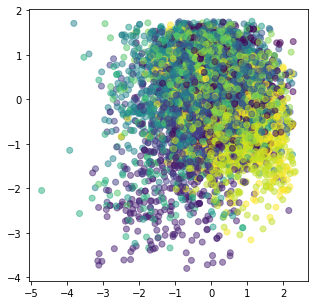

In [53]:
plt.figure(figsize=(5,5))
plt.scatter(X_prep[:,0], X_prep[:,1], c=clusters, alpha=0.5)
plt.show()

In [54]:
kmeans.inertia_

38847.56575768221

In [55]:
kmeans = KMeans(n_clusters=30,
                init="random",
                n_init=30,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

30199.95487060415


Choosing K

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

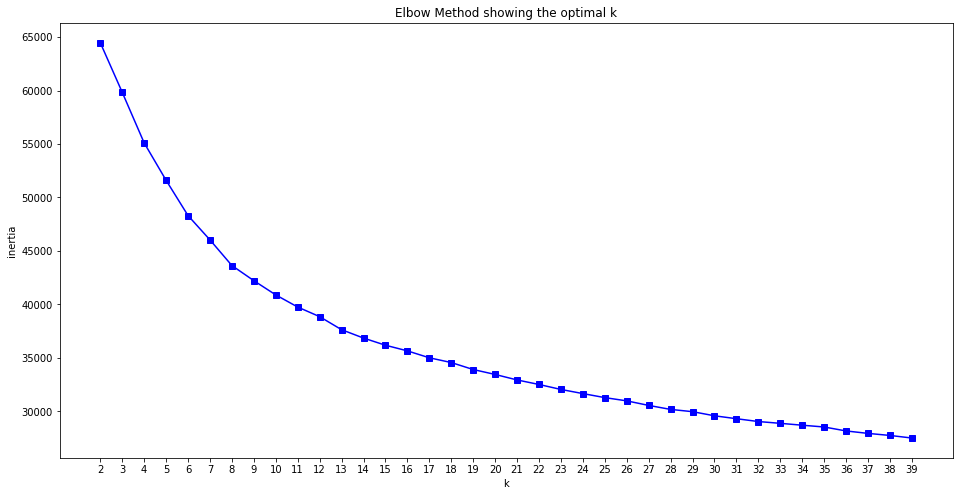

In [48]:
K = range(2, 40)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bs-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

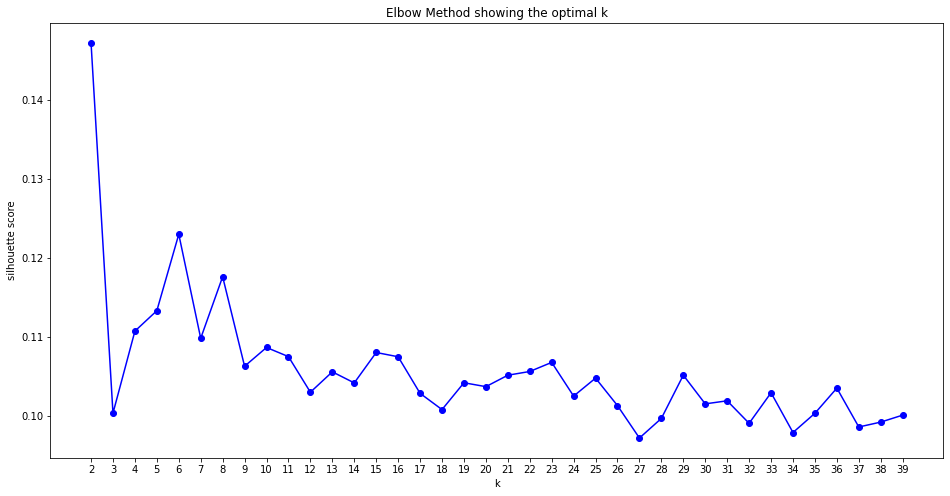

In [49]:
K = range(2, 40)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bo-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')